## 1. Import Libraries and Load Data

In [28]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

In [4]:
# Load data
df_scaled = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Original Data/Dataset-weather-prediction-dataset-processed.csv')
df_answers = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Original Data/Answers-Weather_Prediction_Pleasant_Weather.csv')

## 2. Data Preparation

In [9]:
# Select temperature variables
df_temps = df_scaled[['BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
                      'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
                      'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
                      'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
                      'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
                      'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
                      'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
                      'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
                      'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
                      'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
                      'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
                      'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
                      'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
                      'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
                      'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [15]:
df_answers

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Create X and y
X = df_temps
y = df_answers

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 3. Decision Tree Training

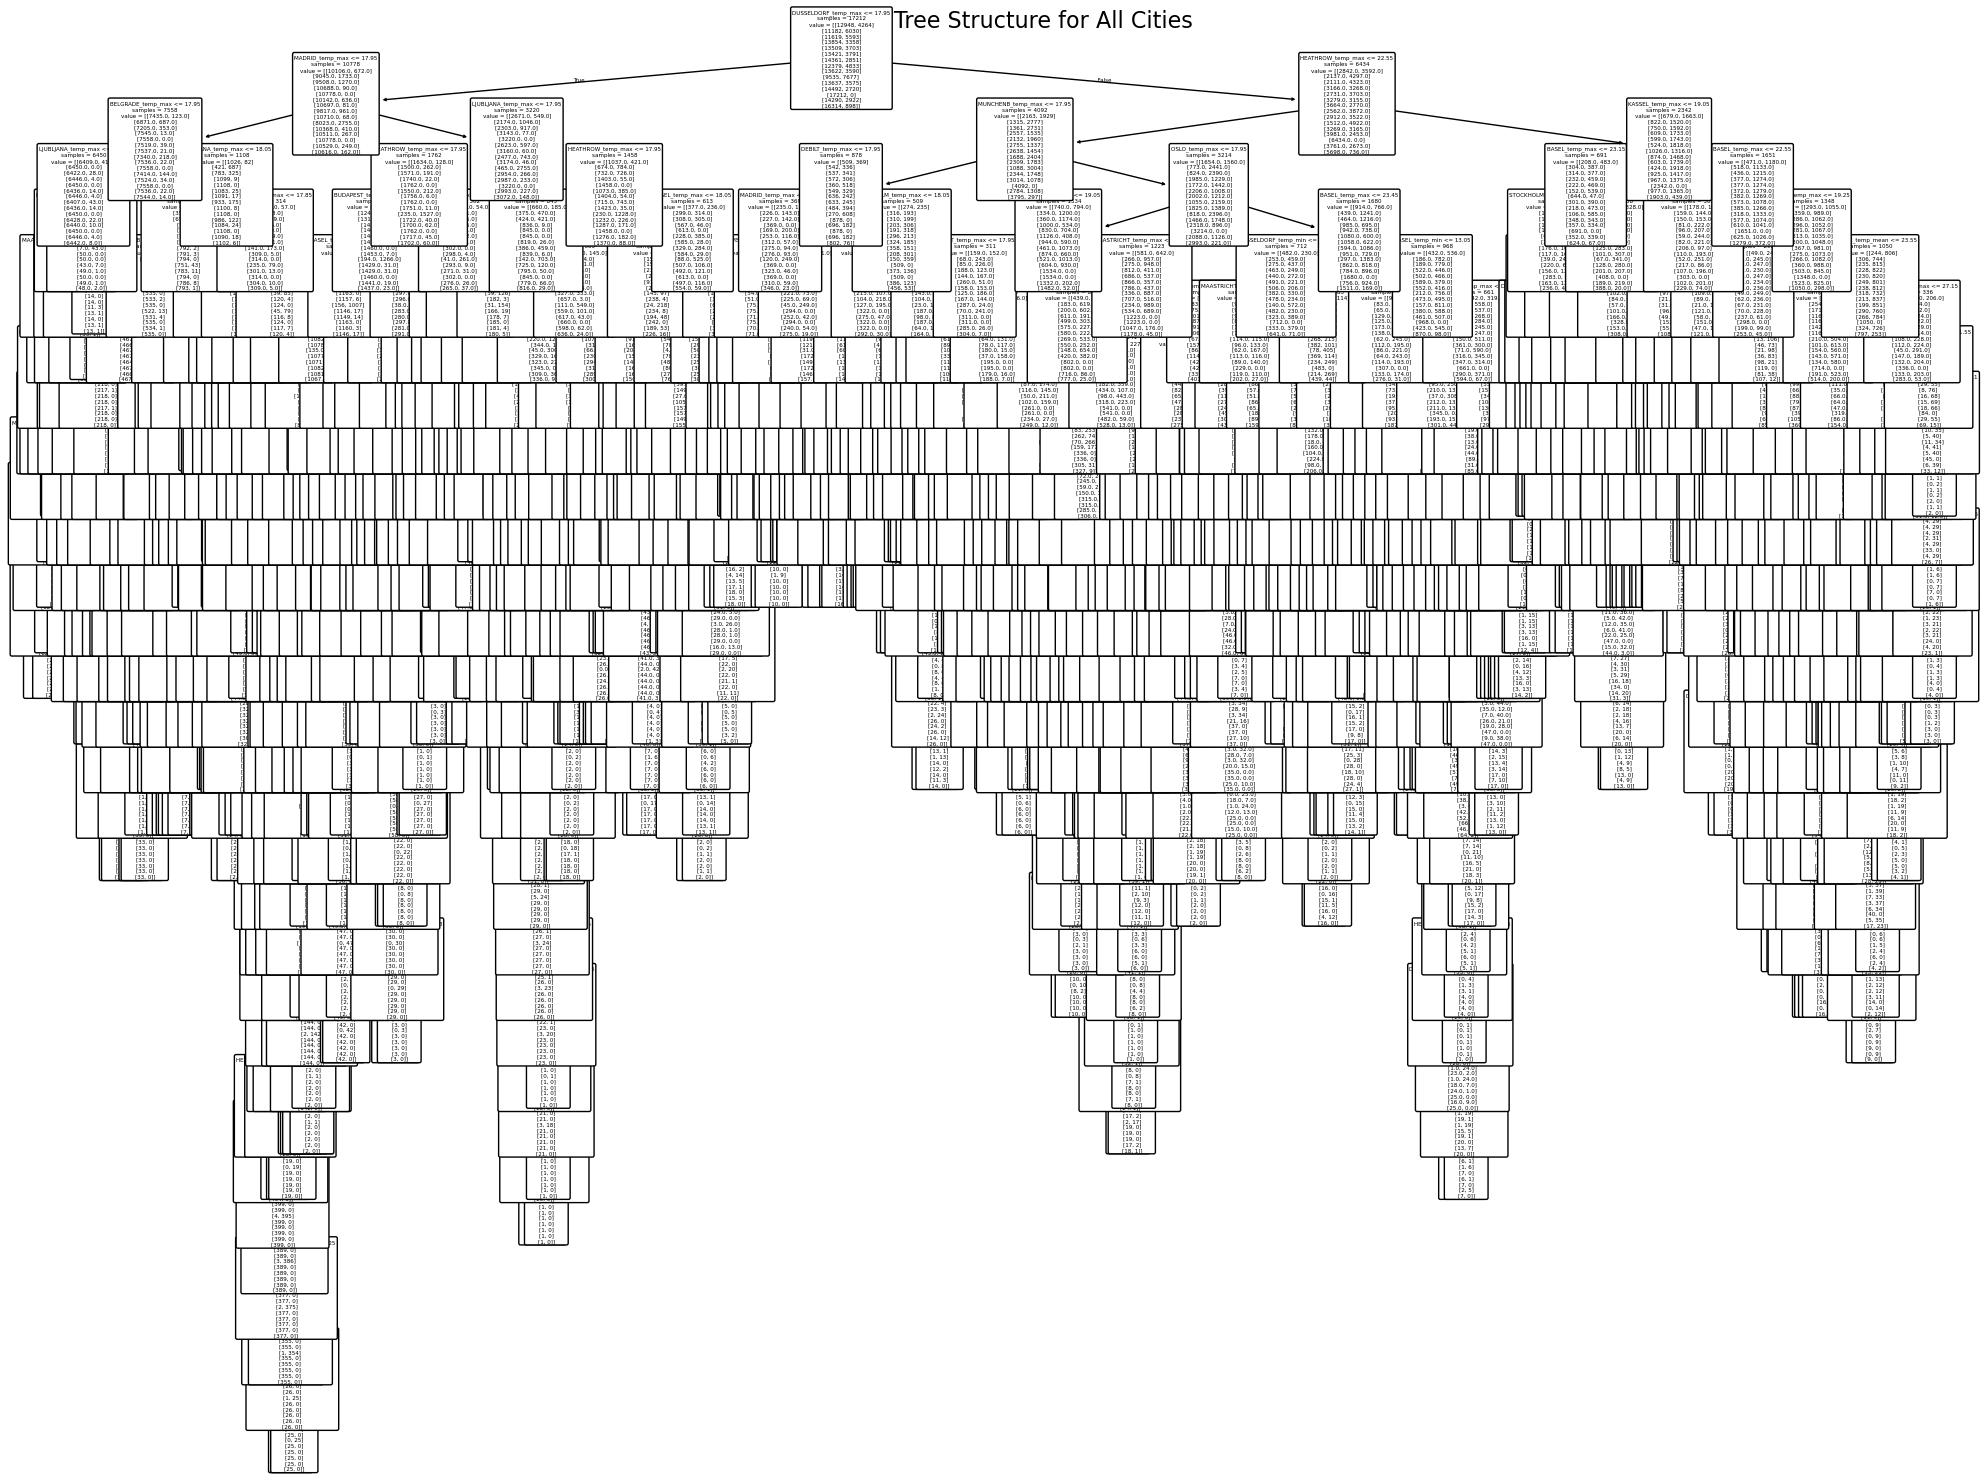

Tree depth: 30
Number of nodes: 2227
Number of leaves: 1114


In [51]:
# Run Decision Tree classifier - single tree for all cities
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=20, random_state=42)
weather_dt.fit(X_train, y_train)

# Plot the tree with emphasis on structure
plt.figure(figsize=(20, 15))
tree.plot_tree(weather_dt, 
               feature_names=X_train.columns,
               filled=False,
               rounded=True,
               fontsize=4,
               impurity=False,
               proportion=False)
plt.title('Decision Tree Structure for All Cities', fontsize=16)
plt.tight_layout()
plt.show()

# Print tree statistics
print(f"Tree depth: {weather_dt.get_depth()}")
print(f"Number of nodes: {weather_dt.tree_.node_count}")
print(f"Number of leaves: {weather_dt.get_n_leaves()}")

In [36]:
# Training accuracy using cross-validation
y_pred_train = weather_dt.predict(X_train)
train_cv_score = cross_val_score(weather_dt, X_train, y_train, cv=3, scoring='accuracy').mean()
print(f'Train accuracy score (CV): {train_cv_score:.4f}')

# Test predictions and accuracy
y_pred_test = weather_dt.predict(X_test)
test_accuracy = weather_dt.score(X_test, y_test)
print(f'Test accuracy score: {test_accuracy:.4f}')

Train accuracy score (CV): 0.4738
Test accuracy score: 0.4786


## 4. Belgrade Decision Tree

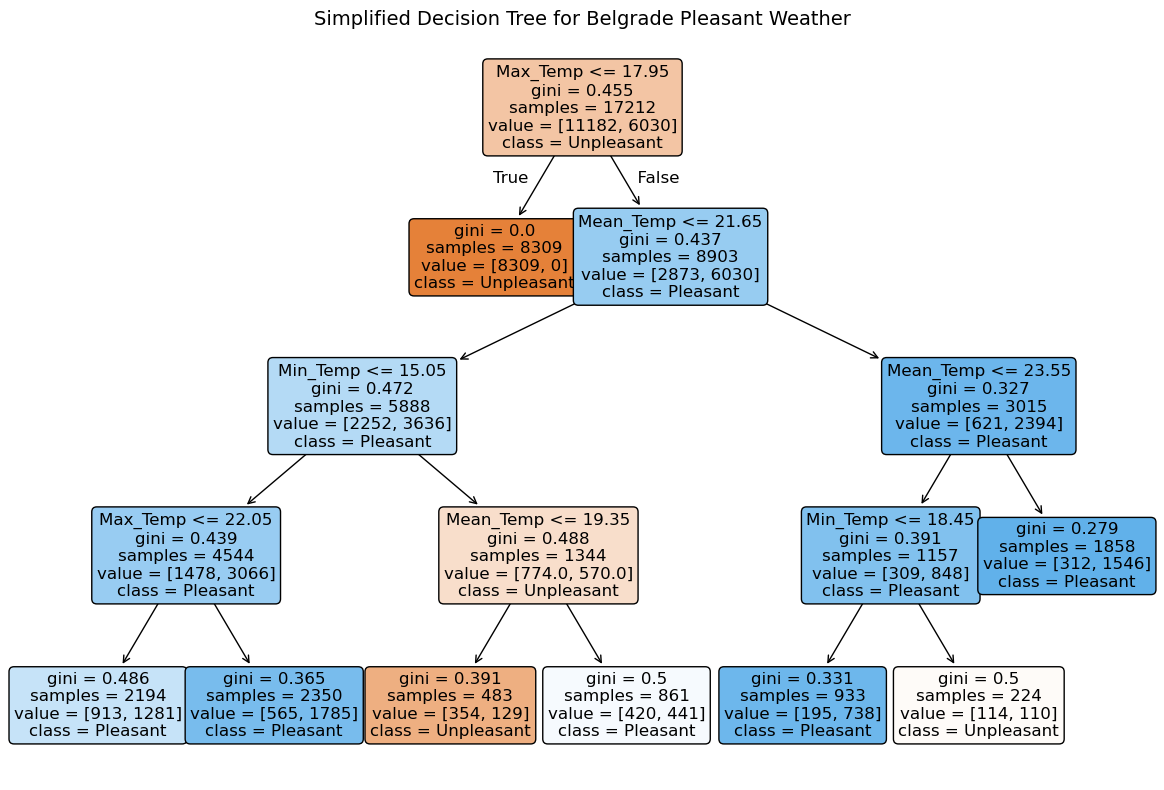

Tree depth: 4
Number of nodes: 15
Number of leaves: 8


In [47]:
# Prepare Belgrade-only data
X_belgrade = df_temps[['BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max']]
y_belgrade = df_answers['BELGRADE_pleasant_weather']

# Split Belgrade data
X_belgrade_train, X_belgrade_test, y_belgrade_train, y_belgrade_test = train_test_split(
   X_belgrade, y_belgrade, random_state=42)

# Train Belgrade Decision Tree with parameters for controlled complexity
belgrade_dt = DecisionTreeClassifier(
   criterion='gini', 
   min_samples_split=50,
   min_samples_leaf=25,
   max_depth=4,
   max_leaf_nodes=8,
   random_state=42
)
belgrade_dt.fit(X_belgrade_train, y_belgrade_train)

# Plot the simplified Belgrade tree
plt.figure(figsize=(12, 8))
tree.plot_tree(belgrade_dt, 
              feature_names=['Mean_Temp', 'Min_Temp', 'Max_Temp'],
              class_names=['Unpleasant', 'Pleasant'],
              filled=True,
              rounded=True,
              fontsize=12)
plt.title('Simplified Decision Tree for Belgrade Pleasant Weather', fontsize=14)
plt.tight_layout()
plt.show()

# Print tree statistics
print(f"Tree depth: {belgrade_dt.get_depth()}")
print(f"Number of nodes: {belgrade_dt.tree_.node_count}")
print(f"Number of leaves: {belgrade_dt.get_n_leaves()}")

In [53]:
# Training accuracy using cross-validation
train_cv_score = cross_val_score(belgrade_dt, X_belgrade_train, y_belgrade_train, cv=3, scoring='accuracy').mean()
print(f'Belgrade Train accuracy score (CV): {train_cv_score:.4f}')

# Test predictions and accuracy
y_pred_belgrade = belgrade_dt.predict(X_belgrade_test)
test_accuracy = belgrade_dt.score(X_belgrade_test, y_belgrade_test)
print(f'Belgrade Test accuracy score: {test_accuracy:.4f}')

Belgrade Train accuracy score (CV): 0.8465
Belgrade Test accuracy score: 0.8384


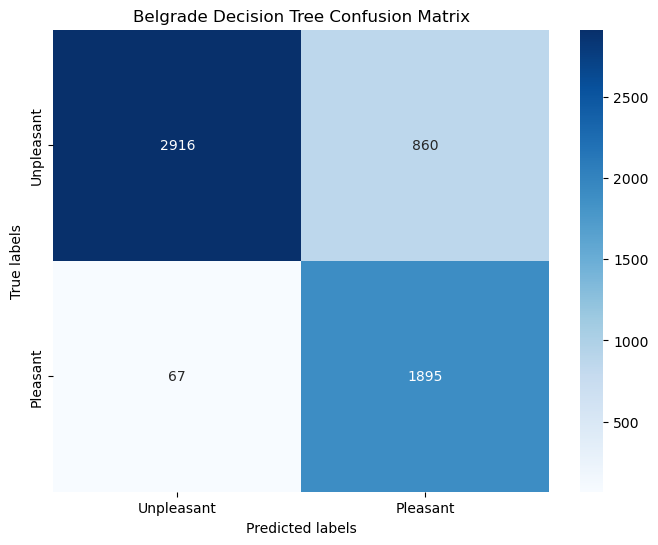

In [55]:
# Create confusion matrix for Belgrade
cm_belgrade = confusion_matrix(y_belgrade_test, y_pred_belgrade)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_belgrade, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.title('Belgrade Decision Tree Confusion Matrix')
plt.xticks([0.5, 1.5], ['Unpleasant', 'Pleasant'])
plt.yticks([0.5, 1.5], ['Unpleasant', 'Pleasant'])
plt.show()

In [57]:
# Get text representation of the Belgrade tree rules
tree_rules = tree.export_text(belgrade_dt, 
                             feature_names=['Mean_Temp', 'Min_Temp', 'Max_Temp'])
print("Decision Tree Rules for Belgrade:")
print(tree_rules)

Decision Tree Rules for Belgrade:
|--- Max_Temp <= 17.95
|   |--- class: 0
|--- Max_Temp >  17.95
|   |--- Mean_Temp <= 21.65
|   |   |--- Min_Temp <= 15.05
|   |   |   |--- Max_Temp <= 22.05
|   |   |   |   |--- class: 1
|   |   |   |--- Max_Temp >  22.05
|   |   |   |   |--- class: 1
|   |   |--- Min_Temp >  15.05
|   |   |   |--- Mean_Temp <= 19.35
|   |   |   |   |--- class: 0
|   |   |   |--- Mean_Temp >  19.35
|   |   |   |   |--- class: 1
|   |--- Mean_Temp >  21.65
|   |   |--- Mean_Temp <= 23.55
|   |   |   |--- Min_Temp <= 18.45
|   |   |   |   |--- class: 1
|   |   |   |--- Min_Temp >  18.45
|   |   |   |   |--- class: 0
|   |   |--- Mean_Temp >  23.55
|   |   |   |--- class: 1

